<a href="https://colab.research.google.com/github/Erre-vicu/PEA-DS-DMC/blob/main/TrabajoFinal_RobinsonRios_M%C3%A9todos_Supervisados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Final
Modelo Analítico para predecir fuga de clientes - Chun_Modelling

## 1.Entendimiento de los Datos

### 1.1 Librerías
Importamos primeras librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use("seaborn-v0_8-darkgrid")
plt.rcdefaults() 

### 1.2 Cargamos Data
En este paso, cargamos la data, analizamos y modificamos categorías

In [ ]:
df=pd.read_csv("churn_modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#ELiminamos la columna RowNumber y Surname
df.drop(columns=["RowNumber","Surname"], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
#Calificamos las variables por su categoria
pk=["CustomerId"]
var_cualitativas=["Geography", "Gender", "HasCrCard", "IsActiveMember", "Exited"]
var_cuantitativas=list(set(df.columns)-set(var_cualitativas)-set(pk))

In [ ]:
#Modificamos las variables por su tipo
df[var_cualitativas]=df[var_cualitativas].astype(str)
df[pk]=df[pk].astype(str)

In [ ]:
#Hacemos la exploración estadística de los datos (Variables cuantitativas)
df[var_cuantitativas].describe().T

,count,mean,std,min,25%,50%,75%,max
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00


In [ ]:
#Hacemos la exploración estadística de los datos (Variables cualitativas)
df[var_cualitativas].describe().T

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457
HasCrCard,10000,2,1,7055
IsActiveMember,10000,2,1,5151
Exited,10000,2,0,7963


In [ ]:
#Revisando si la data contiene nulos
df.isnull().sum()

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#¿Cuál es el porcentaje de manera general de personas que se retiran y dejan el producto?
stay=df[df.Exited=="0"].shape[0]
left=df[df.Exited=="1"].shape[0]

#El porcentaje de clientes que se quedan son:
print(round((stay/df.shape[0])*100,2),"% Es la cantidad de personas que continúan siendo clientes")
print(round((left/df.shape[0])*100,2),"% Es la cantidad de personas que dejan de ser clientes")

79.63 % Es la cantidad de personas que continúan siendo clientes
20.37 % Es la cantidad de personas que dejan de ser clientes


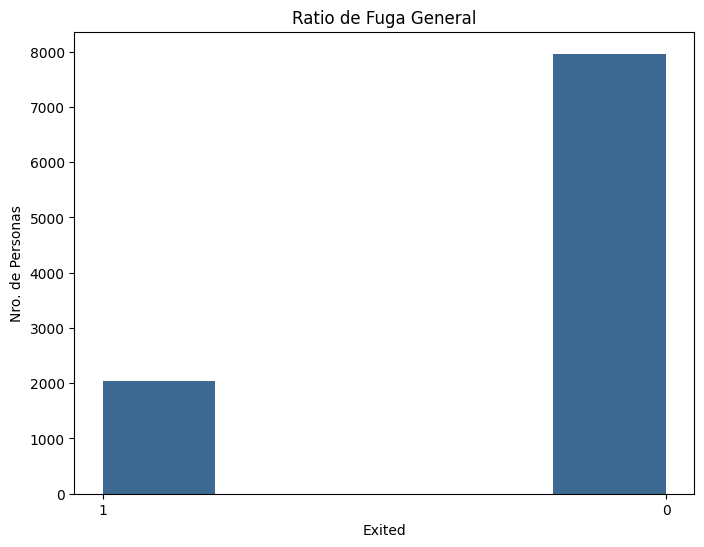

In [ ]:
fig, ax=plt.subplots(figsize=(8,6))
ax.hist(df.Exited, bins=5, color="#3b6991")
ax.set_xlabel("Exited")
ax.set_ylabel("Nro. de Personas")
ax.set_title("Ratio de Fuga General")
plt.show()

### 1.3 Vistas Generales y Comparaciones

#### 1.3.1 Data Analysis

El país con mayor ratio de fuga a pesar de tener solo un 25% de clientes es Alemania con 32.44 % de fuga.


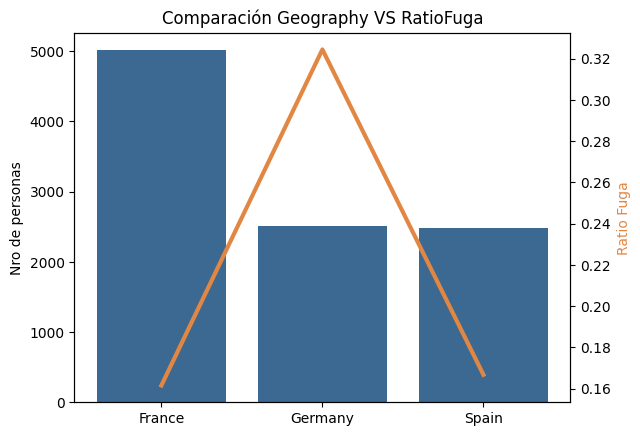

In [ ]:
G1=df.Geography.value_counts()
G2=df.groupby(["Geography", "Exited"]).count()["CreditScore"]
G2=G2.unstack()
G2_tbl=G2["1"]/(G2["0"]+G2["1"])
G1,G2,G2_tbl
x=list(G1.index)
y1=list(G1.values)
y2=list(G2_tbl.values)
print("El país con mayor ratio de fuga a pesar de tener solo un 25% de clientes es Alemania con", round(G2_tbl[1]*100,2),"% de fuga.")

fig,ax=plt.subplots()
ax.bar(x,y1,color="#3b6991")
ax2=ax.twinx()
ax2.plot(x,y2, linewidth=3, color="#e28743")
ax.set_title("Comparación Geography VS RatioFuga")
ax.set_ylabel("Nro de personas")
ax2.set_ylabel("Ratio Fuga", color="#e28743")
plt.show()

En líneas generales, el mayor Ratio de Fuga es por las muejeres con 25.07 %.



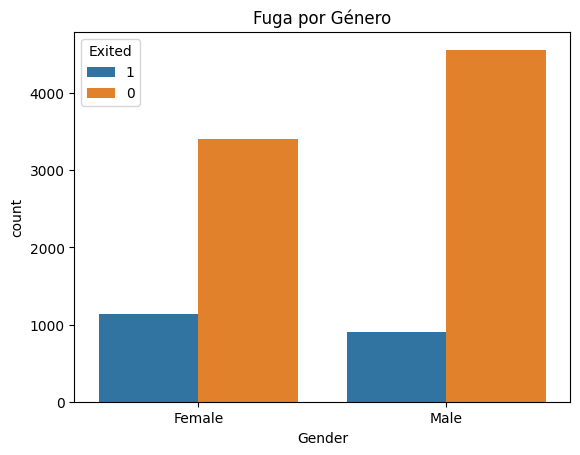

In [ ]:
G3=df.groupby(["Gender", "Exited"]).count()["CreditScore"]
G3=G3.unstack()
G3_tbl=G3["1"]/(G3["0"]+G3["1"])
print("En líneas generales, el mayor Ratio de Fuga es por las muejeres con", round(G3_tbl[0]*100,2),"%.")
print()
sns.countplot(x="Gender", hue="Exited", data=df). set(title="Fuga por Género")
plt.show()

Es el género masculino masculino que cuenta con mayor porcentaje de Tarjeta de crédito con 70.79 %


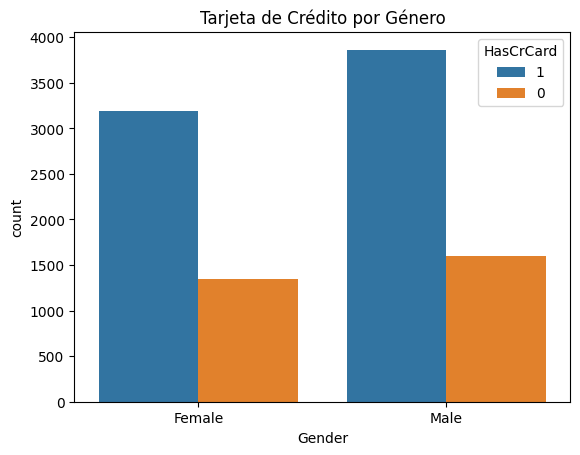

In [ ]:
G4=df.groupby(["Gender", "HasCrCard"]).count()["CreditScore"]
G4=G4.unstack()
G4_tbl=G4["1"]/(G4["0"]+G4["1"])
G4_tbl
print("Es el género masculino masculino que cuenta con mayor porcentaje de Tarjeta de crédito con",round(G4_tbl[1]*100,2),"%")
sns.countplot(x="Gender", hue="HasCrCard", data=df). set(title="Tarjeta de Crédito por Género")
plt.show()

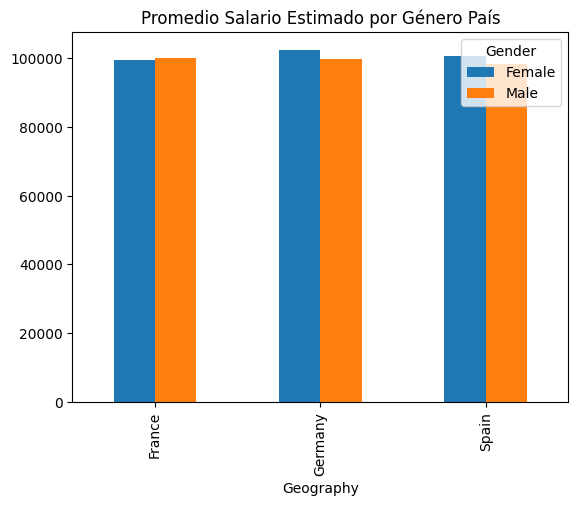

In [ ]:
import warnings
warnings.filterwarnings("ignore")

G5=df.groupby(["Geography", "Gender"]).mean()["EstimatedSalary"]
G5=G5.reset_index()
G5=pd.pivot_table(G5,columns="Gender", index="Geography", values="EstimatedSalary")
G5.plot(kind="bar", title="Promedio Salario Estimado por Género País")
plt.show()

1    7055
0    2945
Name: HasCrCard, dtype: int64


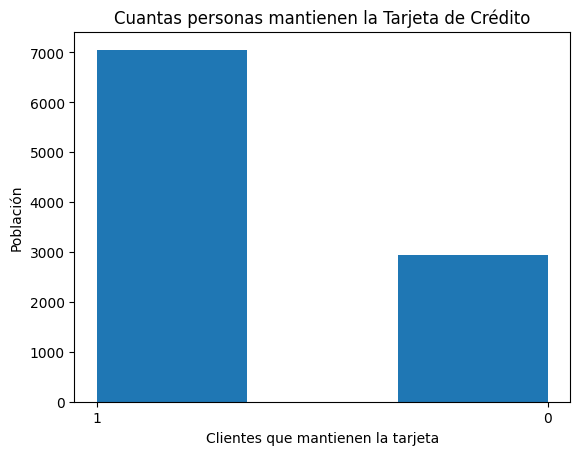

In [ ]:
#Cuantas personas mantienen la tarjeta de crédito
print(df.HasCrCard.value_counts())
plt.hist(df.HasCrCard, bins = 3)
plt.title("Cuantas personas mantienen la Tarjeta de Crédito")
plt.xlabel("Clientes que mantienen la tarjeta")
plt.ylabel("Población")
plt.show()

1    5151
0    4849
Name: IsActiveMember, dtype: int64


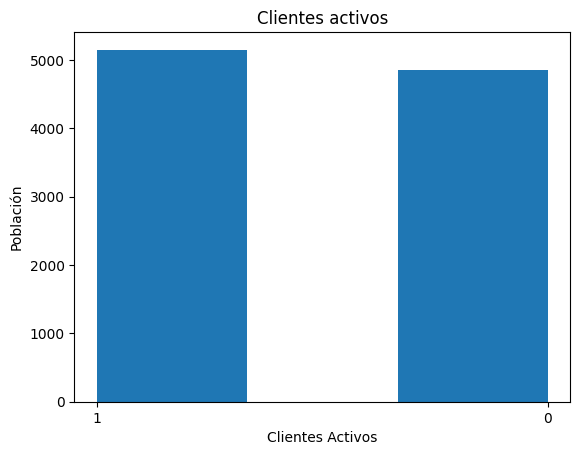

In [ ]:
#Cuantos son clientes activos
print(df.IsActiveMember.value_counts())
plt.hist(df.IsActiveMember, bins = 3)
plt.title("Clientes activos")
plt.xlabel("Clientes Activos")
plt.ylabel("Población")
plt.show()

[('France', 2261, 2753) ('Germany', 1193, 1316) ('Spain', 1089, 1388)]


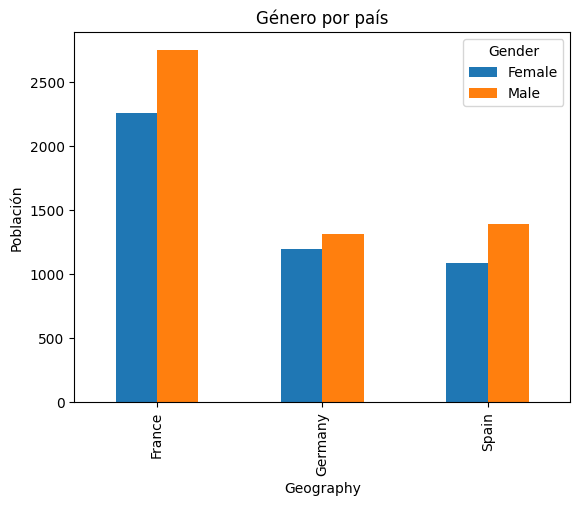

In [ ]:
Gender = pd.crosstab(df['Gender'],df['Geography'])
print(Gender.T.to_records())
Gender=Gender.T
Gender.plot(kind="bar")
plt.title("Género por país")
plt.ylabel("Población")
plt.show()

[('France', 1471, 3543) ('Germany',  718, 1791) ('Spain',  756, 1721)]


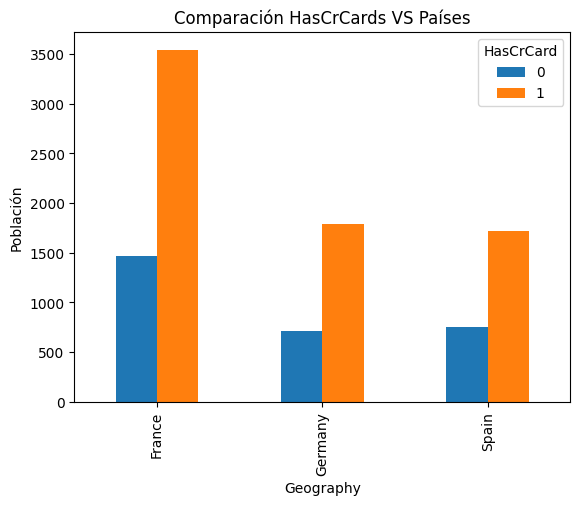

In [ ]:
HasCrCard = pd.crosstab(df["Geography"], df['HasCrCard'])
print(HasCrCard.to_records())
HasCrCard.plot(kind = "bar")
plt.title("Comparación HasCrCards VS Países")
plt.ylabel("Población")
plt.show()

[('France', 2423, 2591) ('Germany', 1261, 1248) ('Spain', 1165, 1312)]


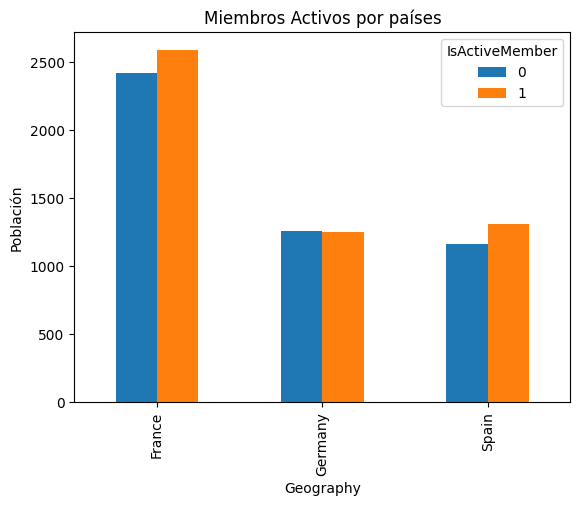

In [ ]:
IsActiveMember=pd.crosstab(df["Geography"],df["IsActiveMember"])
print(IsActiveMember.to_records())
IsActiveMember.plot(kind = "bar")
plt.title("Miembros Activos por países")
plt.ylabel("Población")
plt.show()

In [ ]:
total_france = df.Balance[df.Geography == "France"].sum()
total_germany = df.Balance[df.Geography == "Germany"].sum()
total_spain = df.Balance[df.Geography == "Spain"].sum()

print("El Balance total en Francia es:",total_france)
print("El Balance total en Alemania es:",total_germany)
print("El Balance total en España es:",total_spain)

El Balance total en Francia es: 311332479.49
El Balance total en Alemania es: 300402861.38
El Balance total en España es: 153123552.01


#### 1.3.2 Transformaciones (Encoding)

In [ ]:
#Importamos la Librería a utilizar
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Encoding Gender
le=LabelEncoder() 
le.fit(df["Gender"])
df["Gender_Encode"]=le.transform(df["Gender"])

In [ ]:
#Encoding Geography
le=LabelEncoder() 
le.fit(df["Geography"])
df["Geography_Encode"]=le.transform(df["Geography"])

In [ ]:
#Creamos la variable EstimatedSalary_Log
df["EstimatedSalary_Log"]=np.log(df["EstimatedSalary"])

## 2. Análisis Descriptivo

### 2.1 Estadísticos

In [ ]:
#Definiendo la estadística y corrigiendo variables
metricas=df.describe(percentiles=[0.01,0.25,0.50,0.75,0.99]).T.reset_index().rename(columns={"index":"variables"})

In [ ]:
#Definiendo variables extras y agregandolos
skew=df.skew().reset_index().rename(columns={"index":"variables", 0:"skew"})
kurtosis=df.kurtosis().reset_index().rename(columns={"index":"variables", 0:"kurtosis"})
nulos=df.isna().sum().reset_index().rename(columns={"index":"variables", 0:"nulos"})
metricas=pd.merge(metricas, skew)
metricas=pd.merge(metricas, kurtosis)
metricas=pd.merge(metricas, nulos)

In [ ]:
metricas

,variables,count,mean,std,min,1%,25%,50%,75%,99%,max,skew,kurtosis,nulos
0,CreditScore,10000.0,650.528800,96.653299,350.000000,432.000000,584.000000,652.000000,718.000000,850.000000,850.000000,-0.071607,-0.425726,0
1,Age,10000.0,38.921800,10.487806,18.000000,21.000000,32.000000,37.000000,44.000000,72.000000,92.000000,1.011320,1.395347,0
2,Tenure,10000.0,5.012800,2.892174,0.000000,0.000000,3.000000,5.000000,7.000000,10.000000,10.000000,0.010991,-1.165225,0
3,Balance,10000.0,76485.889288,62397.405202,0.000000,0.000000,0.000000,97198.540000,127644.240000,185967.985400,250898.090000,-0.141109,-1.489412,0
4,NumOfProducts,10000.0,1.530200,0.581654,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,0.745568,0.582981,0
5,EstimatedSalary,10000.0,100090.239881,57510.492818,11.580000,1842.825300,51002.110000,100193.915000,149388.247500,198069.734500,199992.480000,0.002085,-1.181518,0
6,Gender_Encode,10000.0,0.545700,0.497932,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-0.183596,-1.966686,0
7,Geography_Encode,10000.0,0.746300,0.827529,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,0.500916,-1.360998,0
8,EstimatedSalary_Log,10000.0,11.208336,1.000421,2.449279,7.519053,10.839622,11.514863,11.914304,12.196374,12.206035,-2.001146,5.669802,0


In [ ]:
#Reedefiniendo las variables
pk=["CustomerId"]
var_cualitativas=["Geography", "Gender", "HasCrCard", "IsActiveMember", "Exited"]
var_cuantitativas=list(set(df.columns)-set(var_cualitativas)-set(pk))

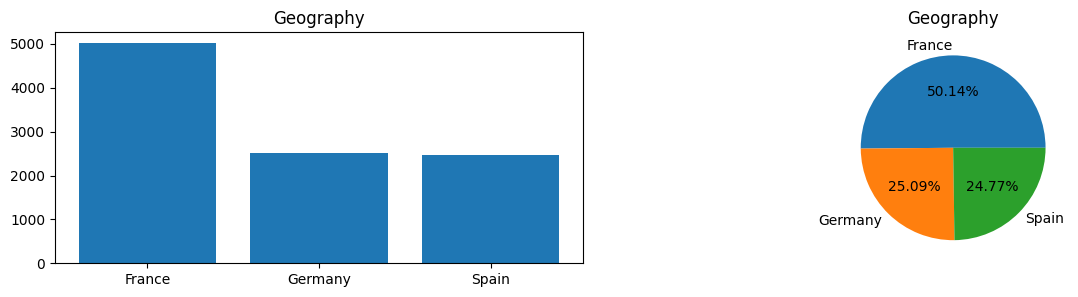

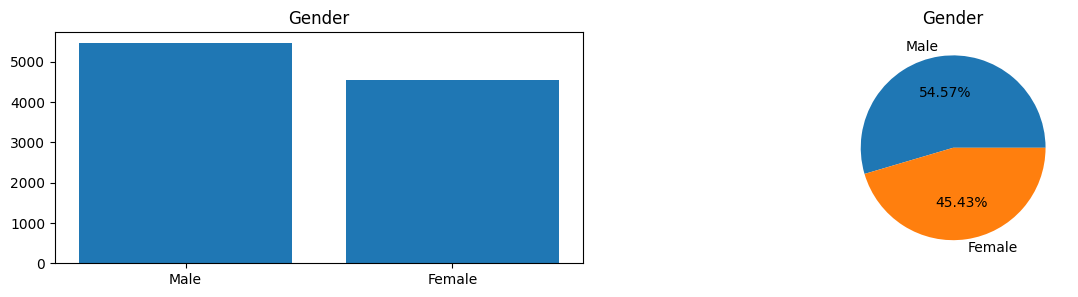

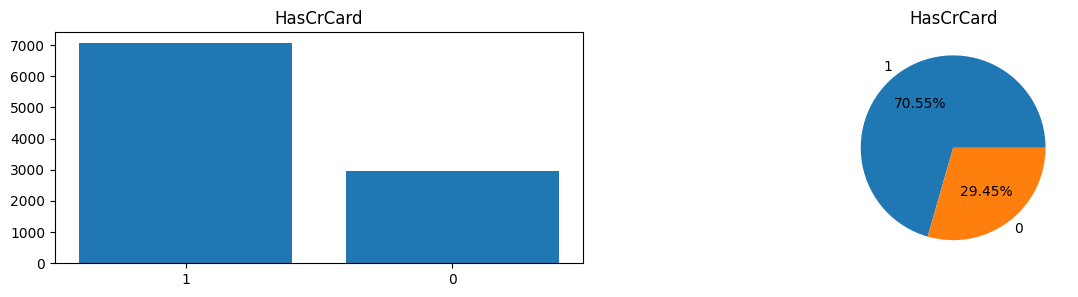

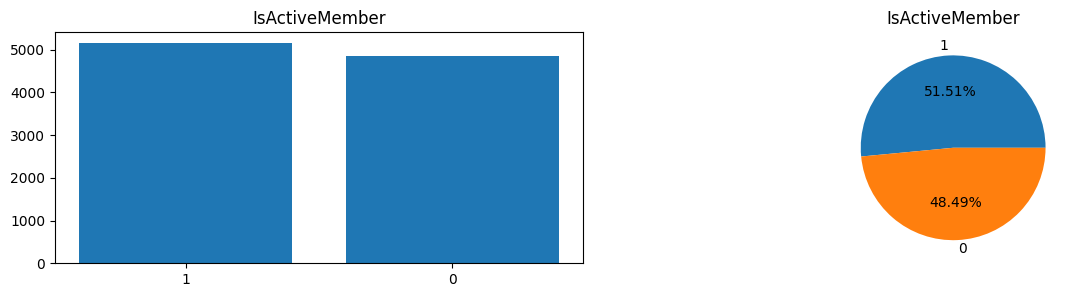

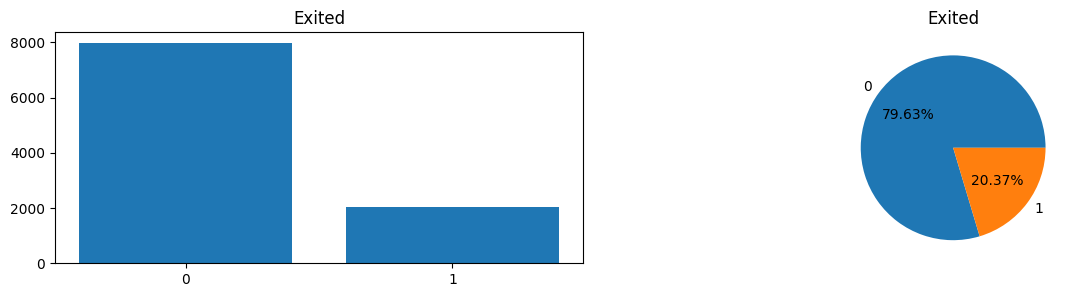

In [ ]:
for c in var_cualitativas:
    G=df[c].value_counts()
    fig,ax=plt.subplots(1,2, figsize=(15,3))
    ax[0].bar(G.index, G.values)
    ax[1].pie(G.values,labels=G.index, autopct="%.2f%%")
    ax[0].set_title(f"{c}")
    ax[1].set_title(f"{c}")
                    

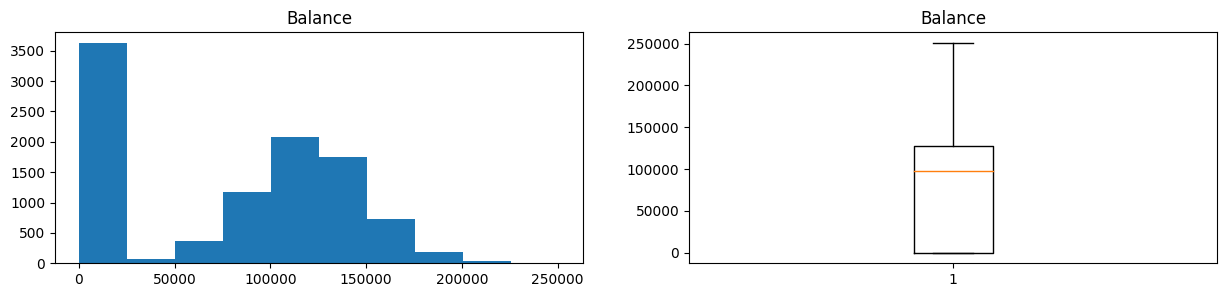

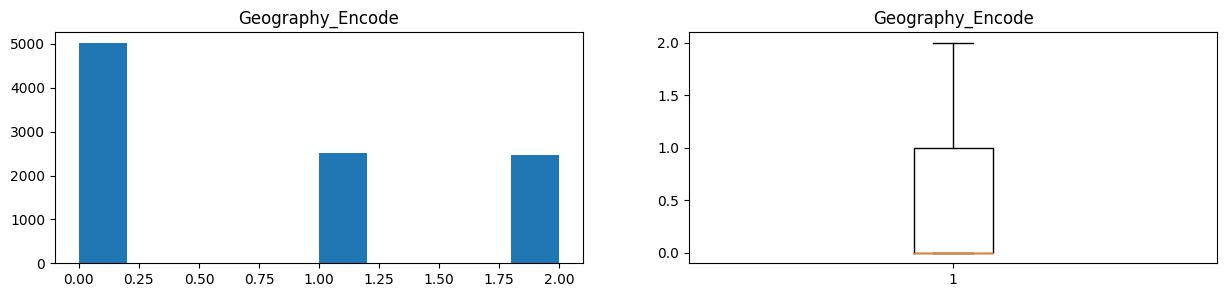

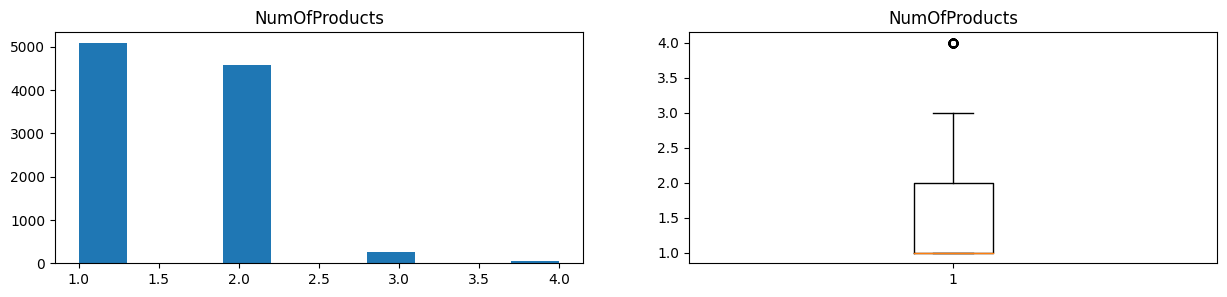

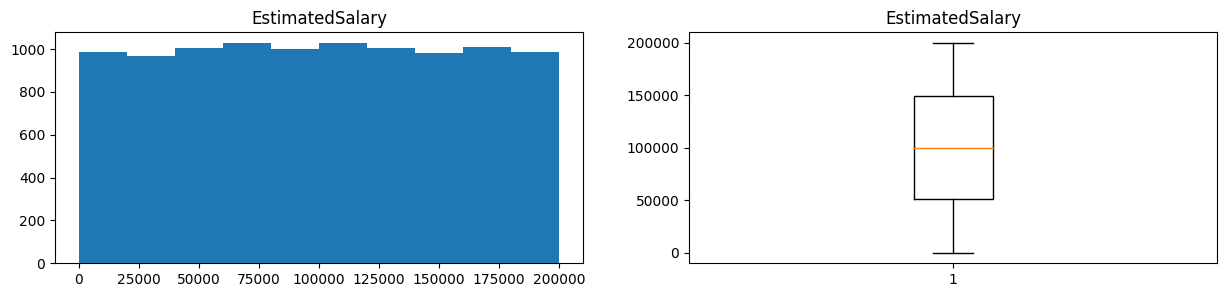

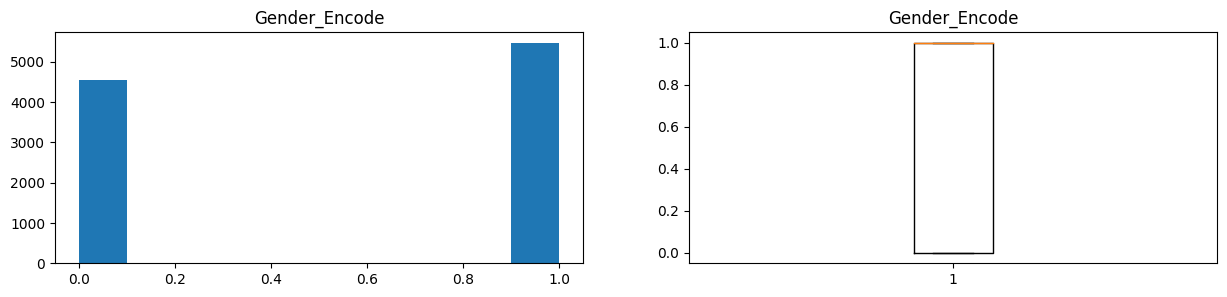

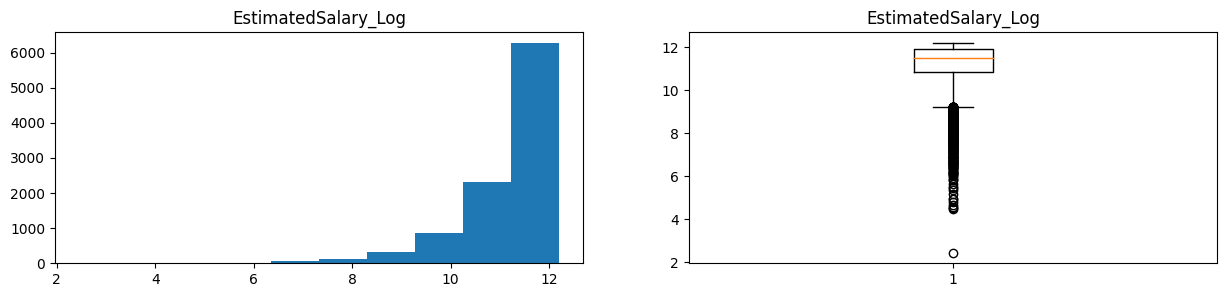

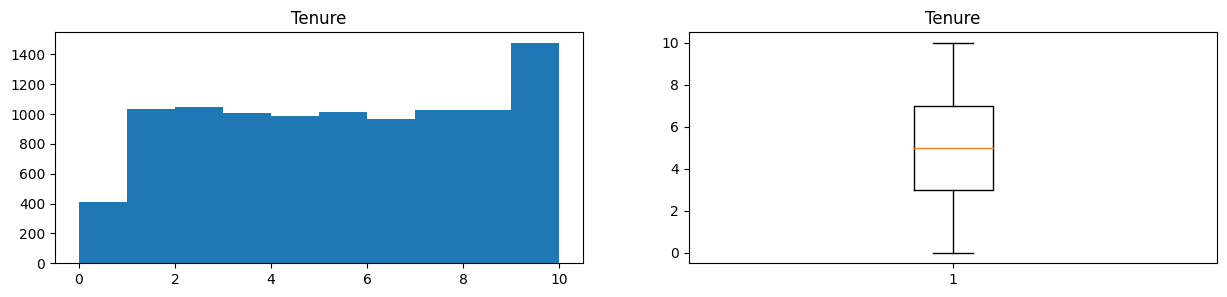

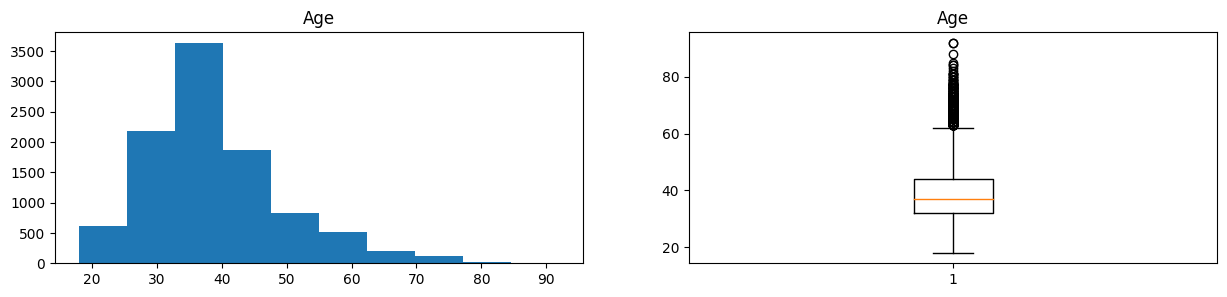

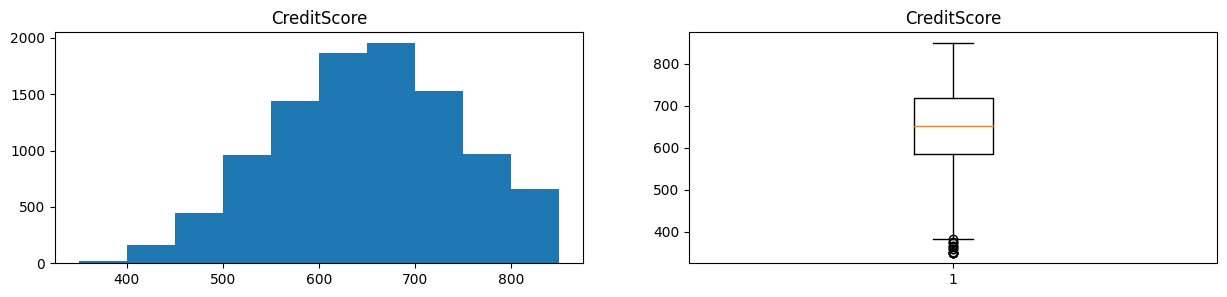

In [ ]:
for v in var_cuantitativas:
    fig,ax=plt.subplots(1,2, figsize=(15,3))
    ax[0].hist(df[v])
    ax[1].boxplot(df[v])
    ax[0].set_title(f"{v}")
    ax[1].set_title(f"{v}")    

### 2.3 Corrigiendo Outliers

In [ ]:
outliers=df[var_cuantitativas].quantile([0.25,0.75]).T.reset_index().rename(columns={"index":"variables", 0.25:"Q1", 0.75:"Q3"})
outliers

,variables,Q1,Q3
0,Balance,0.000000,127644.240000
1,Geography_Encode,0.000000,1.000000
2,NumOfProducts,1.000000,2.000000
3,EstimatedSalary,51002.110000,149388.247500
4,Gender_Encode,0.000000,1.000000
5,EstimatedSalary_Log,10.839622,11.914304
6,Tenure,3.000000,7.000000
7,Age,32.000000,44.000000
8,CreditScore,584.000000,718.000000


In [ ]:
#definiendo limite para los outliers
outliers["LimSup"]=outliers["Q3"]+1.5*(outliers["Q3"]-outliers["Q1"])
outliers["LimInf"]=outliers["Q1"]-1.5*(outliers["Q3"]-outliers["Q1"])
outliers

,variables,Q1,Q3,LimSup,LimInf
0,Balance,0.000000,127644.240000,319110.600000,-191466.36000
1,Geography_Encode,0.000000,1.000000,2.500000,-1.50000
2,NumOfProducts,1.000000,2.000000,3.500000,-0.50000
3,EstimatedSalary,51002.110000,149388.247500,296967.453750,-96577.09625
4,Gender_Encode,0.000000,1.000000,2.500000,-1.50000
5,EstimatedSalary_Log,10.839622,11.914304,13.526326,9.22760
6,Tenure,3.000000,7.000000,13.000000,-3.00000
7,Age,32.000000,44.000000,62.000000,14.00000
8,CreditScore,584.000000,718.000000,919.000000,383.00000


In [ ]:
var_outliers=list()
for v in outliers["variables"]:
    LimSup=outliers[["LimSup"]][outliers["variables"]==v]
    LimSup=list(LimSup["LimSup"])[0]
    LimInf=outliers[["LimInf"]][outliers["variables"]==v]
    LimInf=list(LimInf["LimInf"])[0]
#     print(v,LimSup,LimInf)
    n_outliers_sup=(df[v]>LimSup).sum()
    n_outliers_inf=(df[v]<LimInf).sum()
    if n_outliers_inf+n_outliers_sup>0:
#         print(v,n_outliers_inf, n_outliers_sup)
        var_outliers.append([v,LimInf, LimSup])
var_outliers

[['NumOfProducts', -0.5, 3.5],
 ['EstimatedSalary_Log', 9.22759976255729, 13.526326355183222],
 ['Age', 14.0, 62.0],
 ['CreditScore', 383.0, 919.0]]

In [ ]:
for o in var_outliers:
    o,LimInf, LimSup=tuple(o)
    df[o]=df[o].apply(lambda x: x if x<LimSup else LimSup)
    df[o]=df[o].apply(lambda x: x if x>LimInf else LimInf)

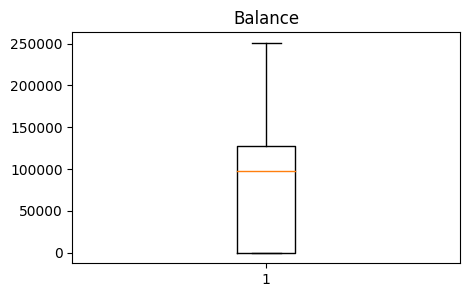

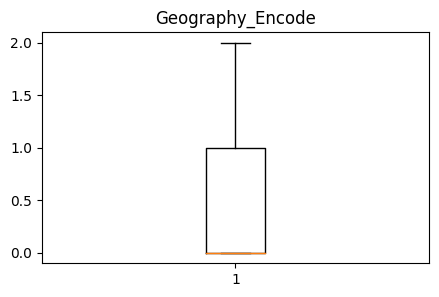

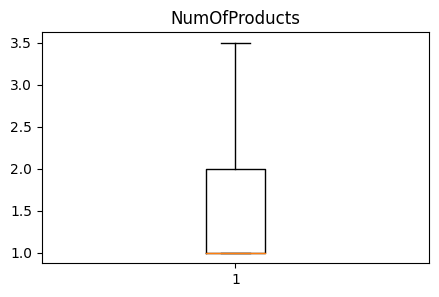

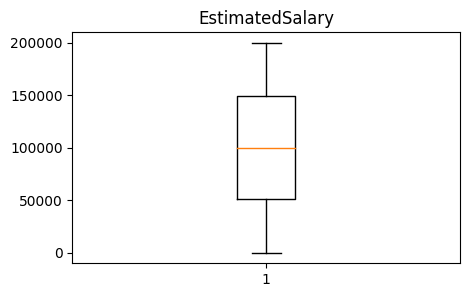

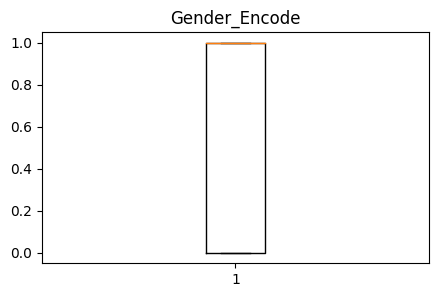

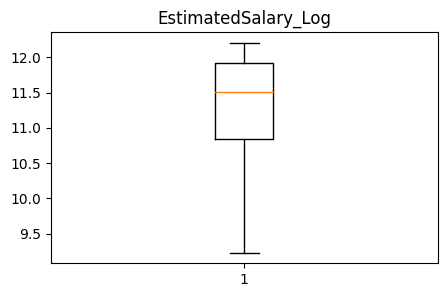

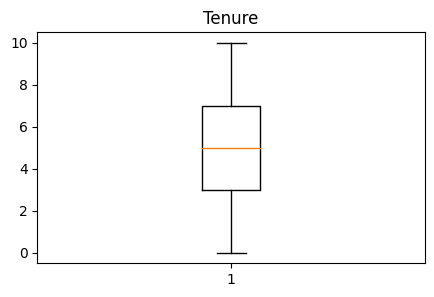

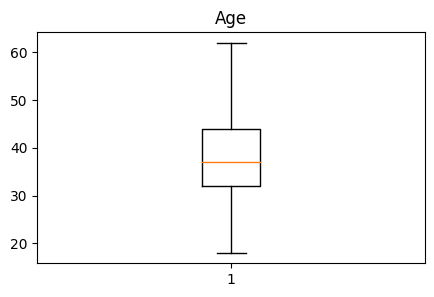

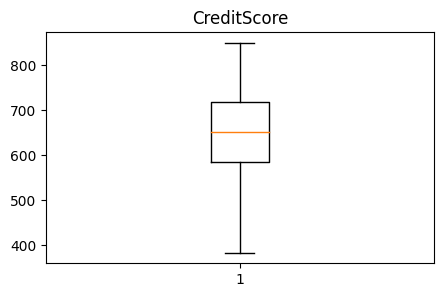

In [ ]:
for v in var_cuantitativas:
    fig,ax=plt.subplots(figsize=(5,3))
    ax.boxplot(df[v])
    ax.set_title(v)

### 2.4 Correlaciones

In [ ]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Gender_Encode,Geography_Encode,EstimatedSalary_Log
CreditScore,1.000000,-0.007703,0.000721,0.006389,0.012276,-0.001150,-0.002929,0.007943,-0.002381
Age,-0.007703,1.000000,-0.011163,0.033021,-0.036776,-0.007392,-0.028953,0.025338,-0.000730
Tenure,0.000721,-0.011163,1.000000,-0.012254,0.013194,0.007784,0.014733,0.003739,0.008557
Balance,0.006389,0.033021,-0.012254,1.000000,-0.311810,0.012797,0.012087,0.069408,0.017309
NumOfProducts,0.012276,-0.036776,0.013194,-0.311810,1.000000,0.014065,-0.020410,0.004771,0.012344
EstimatedSalary,-0.001150,-0.007392,0.007784,0.012797,0.014065,1.000000,-0.008112,-0.001369,0.935329
Gender_Encode,-0.002929,-0.028953,0.014733,0.012087,-0.020410,-0.008112,1.000000,0.004719,-0.006854
Geography_Encode,0.007943,0.025338,0.003739,0.069408,0.004771,-0.001369,0.004719,1.000000,-0.003377
EstimatedSalary_Log,-0.002381,-0.000730,0.008557,0.017309,0.012344,0.935329,-0.006854,-0.003377,1.000000


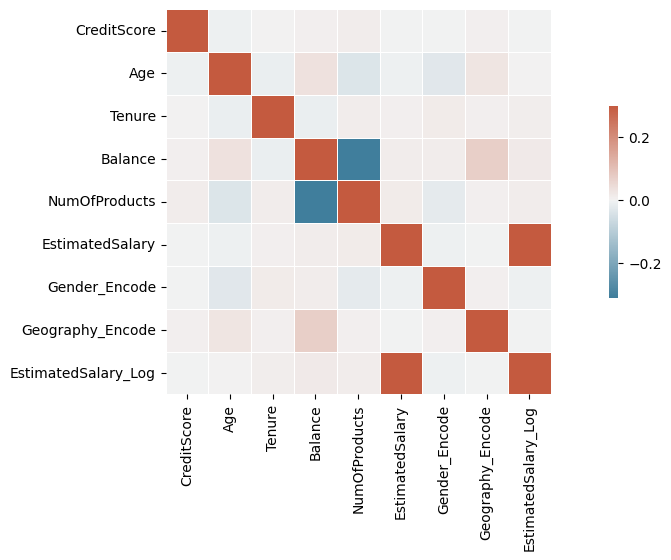

In [ ]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
fig,ax=plt.subplots(figsize=(15,5))
sns.heatmap(df.corr(),cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

## 3. Estandarizando las variables

### 3.1 Escalando la data

In [ ]:
columnas=['Gender_Encode','NumOfProducts','Tenure','EstimatedSalary','Balance','CreditScore','EstimatedSalary_Log','Age',
  'Geography_Encode','Exited']

In [ ]:
df_prep=df[columnas]

In [ ]:
#Escalando la data
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler=MinMaxScaler()
scaled=scaler.fit_transform(df_prep)
scaled

array([[0.        , 0.        , 0.2       , ..., 0.54545455, 0.        ,
        1.        ],
       [0.        , 0.        , 0.1       , ..., 0.52272727, 1.        ,
        0.        ],
       [0.        , 0.8       , 0.8       , ..., 0.54545455, 0.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.7       , ..., 0.40909091, 0.        ,
        1.        ],
       [1.        , 0.4       , 0.3       , ..., 0.54545455, 0.5       ,
        1.        ],
       [0.        , 0.        , 0.4       , ..., 0.22727273, 0.        ,
        0.        ]])

In [ ]:
df_prep_scaled=pd.DataFrame(data=scaled, columns=columnas)
df_prep_scaled.head()

,Gender_Encode,NumOfProducts,Tenure,EstimatedSalary,Balance,CreditScore,EstimatedSalary_Log,Age,Geography_Encode,Exited
0,0.0,0.0,0.2,0.506735,0.000000,0.505353,0.771789,0.545455,0.0,1.0
1,0.0,0.0,0.1,0.562709,0.334031,0.481799,0.806963,0.522727,1.0,0.0
2,0.0,0.8,0.8,0.569654,0.636357,0.254818,0.811081,0.545455,0.0,1.0
3,0.0,0.4,0.1,0.469120,0.000000,0.676660,0.745896,0.477273,0.0,0.0
4,0.0,0.0,0.2,0.395400,0.500246,1.000000,0.688505,0.568182,1.0,0.0


In [ ]:
df_prep.to_csv("df_prep.csv")
df_prep_scaled.to_csv("df_prep_scaled.csv")

### 3.2 Definiendo "X" y "Y"

In [ ]:
y=df_prep_scaled["Exited"] #variables predictoras
x=df_prep_scaled.drop(columns=["Exited"]) # variables target

In [ ]:
# y=df_prep["Exited"] #variables predictoras
# x=df_prep.drop(columns=["Exited"]) # variables target

### 3.3 Split, Train and Test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

In [ ]:
#1era Validación
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7000, 9)
(7000,)
(3000, 9)
(3000,)


## 4. Modelos

### 4.1 Regresión Logística

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

modeloLR = LogisticRegression()
modeloLR.fit(x_train, y_train)

y_pred = modeloLR.predict(x_test)

print("Training Accuracy :", modeloLR.score(x_train, y_train))
print("Testing Accuracy :", modeloLR.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Training Accuracy : 0.7928571428571428
Testing Accuracy : 0.786
Confusion Matrix:
 [[2278  101]
 [ 541   80]]


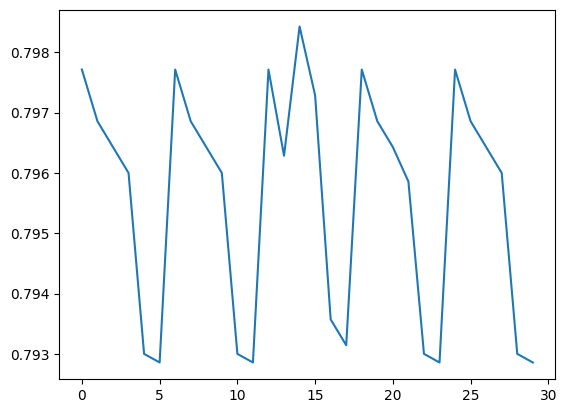

In [ ]:
import warnings
warnings.filterwarnings("ignore")
solvers=["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
Cs=[0.01,0.02,0.05,0.1,0.5,1]
list_scores=list()
for s in solvers:
    for c in Cs:
        modeloLR=LogisticRegression(C=c, solver=s).fit(x_train, y_train)
        list_scores.append(modeloLR.score(x_train, y_train))
plt.plot(list_scores)

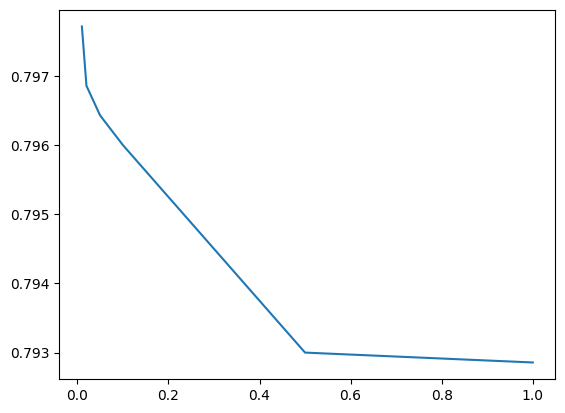

In [ ]:
Cs=[0.01,0.02,0.05,0.1,0.5,1]
list_scores=list()
for c in Cs:
    modeloLR=LogisticRegression(C=c, solver="sag").fit(x_train, y_train)
    list_scores.append(modeloLR.score(x_train, y_train))
plt.plot(Cs,list_scores)

In [ ]:
#Liblinear y 0.1

In [ ]:
modeloLR = LogisticRegression(C=0.1)
modeloLR.fit(x_train, y_train)

y_pred = modeloLR.predict(x_test)

print("Training Accuracy :", modeloLR.score(x_train, y_train))
print("Testing Accuracy :", modeloLR.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Training Accuracy : 0.796
Testing Accuracy : 0.787
Confusion Matrix:
 [[2309   70]
 [ 569   52]]


### 4.2 Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
modeloSVC = SVC()
modeloSVC.fit(x_train, y_train)

y_pred = modeloSVC.predict(x_test)

print("Training Accuracy :", modeloSVC.score(x_train, y_train))
print("Testing Accuracy :", modeloSVC.score(x_test, y_test))     

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Training Accuracy : 0.8317142857142857
Testing Accuracy : 0.8233333333333334
Confusion Matrix:
 [[2341   38]
 [ 492  129]]


In [ ]:
#Buscando los mejores parámetros
from sklearn import metrics
list_kernel=["linear", "poly", "rbf", "sigmoid"]
for k in list_kernel:
    modeloSVC=SVC(kernel=k)
    modeloSVC.fit(x_train, y_train)
    print(metrics.accuracy_score(y_train, modeloSVC.predict(x_train)))

0.7977142857142857
0.8264285714285714
0.8317142857142857
0.6711428571428572


In [ ]:
list_kernel=["linear", "poly", "rbf", "sigmoid"]
list_acc_train=list()
list_acc_test=list()
for k in list_kernel:
    modeloSVC=SVC(kernel=k)
    modeloSVC.fit(x_train, y_train)
    list_acc_train.append(metrics.accuracy_score(y_train, modeloSVC.predict(x_train)))
    list_acc_test.append(metrics.accuracy_score(y_test, modeloSVC.predict(x_test)))    
display(list_acc_train)
display(list_acc_test)

[0.7977142857142857,
 0.8264285714285714,
 0.8317142857142857,
 0.6711428571428572]

[0.793, 0.821, 0.8233333333333334, 0.6696666666666666]

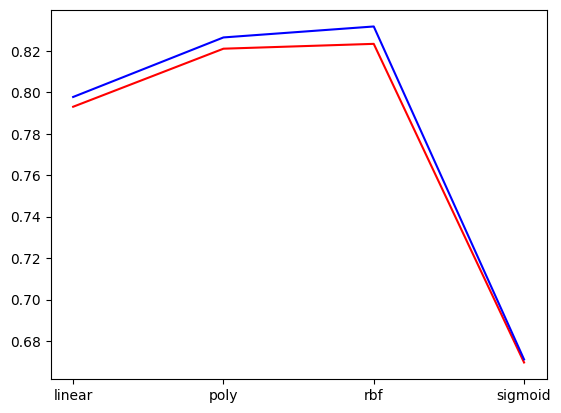

In [ ]:
plt.plot(list_kernel, list_acc_test, color="red")   #Underfitting
plt.plot(list_kernel, list_acc_train, color="blue") #overfitting

### 4.3 Árbol de Decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

modeloDT = DecisionTreeClassifier() 
modeloDT.fit(x_train, y_train)

y_pred = modeloDT.predict(x_test)

print("Training Accuracy :", modeloDT.score(x_train, y_train))
print("Testing Accuaracy :", modeloDT.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)

Training Accuracy : 1.0
Testing Accuaracy : 0.7896666666666666
Confusion Matrix:
 [[2049  330]
 [ 301  320]]


In [ ]:
modeloDT.get_depth()

24

#### 4.3.1 Podando el árbol

In [ ]:
from sklearn import metrics
modeloDT_bonsai=DecisionTreeClassifier(max_depth=3)
modeloDT_bonsai.fit(x_train, y_train)
modeloDT_bonsai.get_params()
y_pred = modeloDT_bonsai.predict(x_test)
print("Training Accuracy:",metrics.accuracy_score(y_train, modeloDT_bonsai.predict(x_train)))
print("Testing Accuracy:",metrics.accuracy_score(y_test, modeloDT_bonsai.predict(x_test)))

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n",cm)

Training Accuracy: 0.8255714285714286
Testing Accuracy: 0.8216666666666667
Confusion Matrix:
 [[2113  266]
 [ 269  352]]


#### 4.3.2 BUscando el modelo óptimo

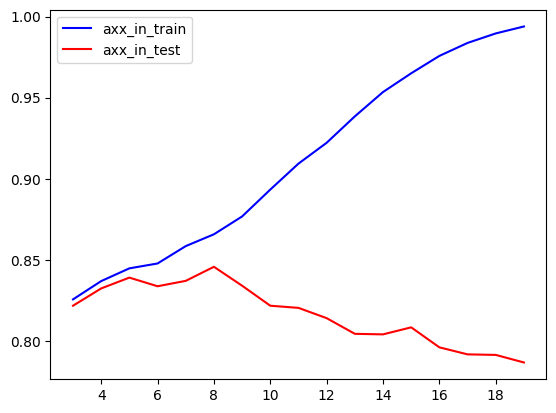

In [ ]:
list_max_depth=range(3,20)
list_acc_train=list()
list_acc_test=list()
for k in list_max_depth:
    modeloDT_bonsai=DecisionTreeClassifier(max_depth=k)
    modeloDT_bonsai.fit(x_train, y_train)
    list_acc_train.append(metrics.accuracy_score(y_train, modeloDT_bonsai.predict(x_train)))
    list_acc_test.append(metrics.accuracy_score(y_test, modeloDT_bonsai.predict(x_test)))
fig, ax=plt.subplots()
ax.plot(list_max_depth,list_acc_train, label="axx_in_train", color="blue")
ax.plot(list_max_depth,list_acc_test, label="axx_in_test", color="red")
ax.legend()

In [ ]:
from sklearn import metrics
modeloDT_bonsai=DecisionTreeClassifier(max_depth=8)
modeloDT_bonsai.fit(x_train, y_train)
modeloDT_bonsai.get_params()
y_pred = modeloDT_bonsai.predict(x_test)
print("Training Accuracy:",metrics.accuracy_score(y_train, modeloDT_bonsai.predict(x_train)))
print("Testing Accuracy:",metrics.accuracy_score(y_test, modeloDT_bonsai.predict(x_test)))

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n",cm)

Training Accuracy: 0.8657142857142858
Testing Accuracy: 0.8453333333333334
Confusion Matrix:
 [[2290   89]
 [ 375  246]]


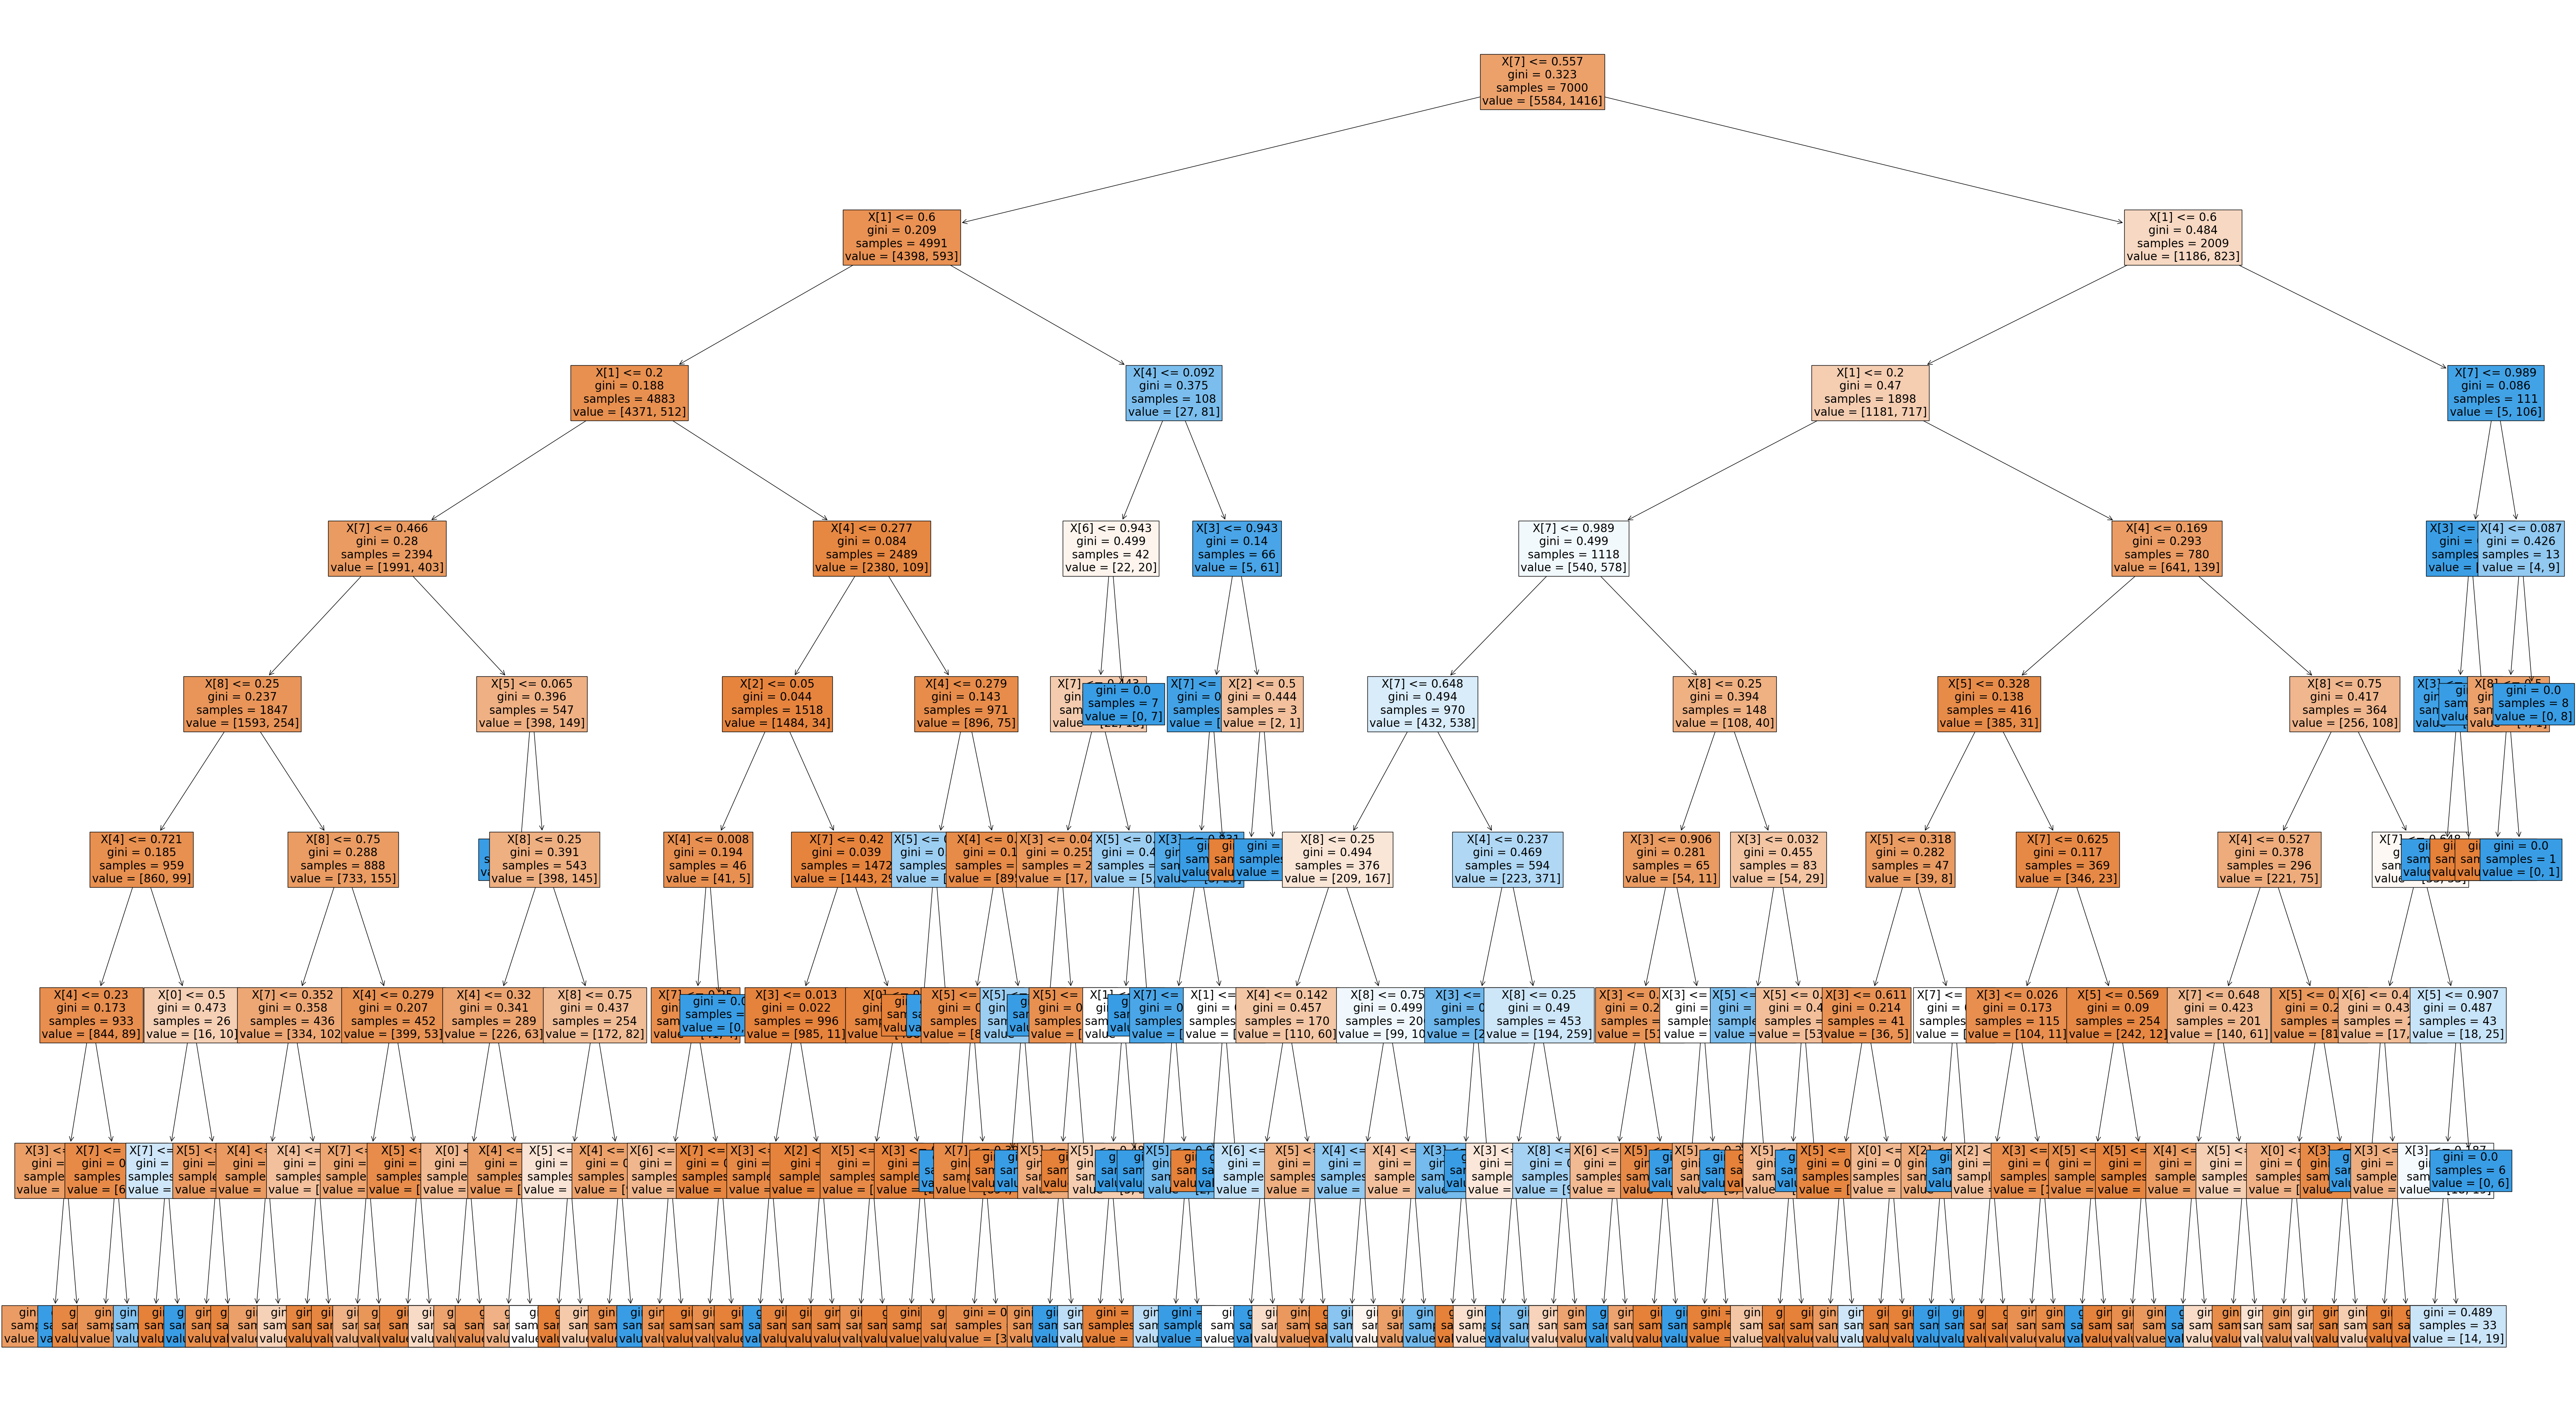

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,45))
plot_tree(modeloDT_bonsai, filled=True, fontsize=20)
plt.show()

### 4.4 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modeloRF = RandomForestClassifier()
modeloRF.fit(x_train, y_train)

y_pred = modeloRF.predict(x_test)

print("Training Accuracy :", modeloRF.score(x_train, y_train))
print("Testing Accuracy :", modeloRF.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)

Training Accuracy : 1.0
Testing Accuracy : 0.8446666666666667
Confusion Matrix:
 [[2255  124]
 [ 342  279]]


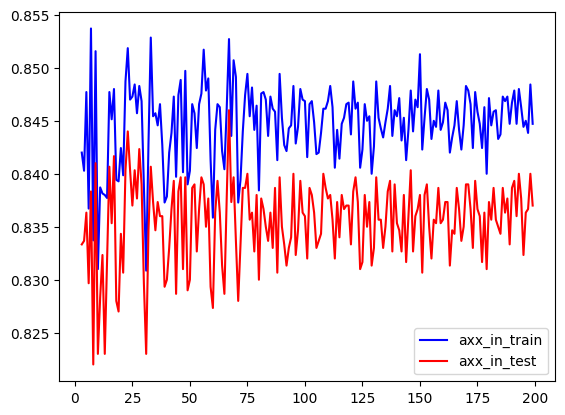

In [ ]:
list_n_estimators=range(3,200)
list_acc_train=list()
list_acc_test=list()
for k in list_n_estimators:
    modeloRF=RandomForestClassifier(n_estimators=k, max_depth=5)
    modeloRF.fit(x_train, y_train)
    list_acc_train.append(metrics.accuracy_score(y_train, modeloRF.predict(x_train)))
    list_acc_test.append(metrics.accuracy_score(y_test, modeloRF.predict(x_test)))
fig, ax=plt.subplots()
ax.plot(list_n_estimators,list_acc_train, label="axx_in_train", color="blue")
ax.plot(list_n_estimators,list_acc_test, label="axx_in_test", color="red")
ax.legend()

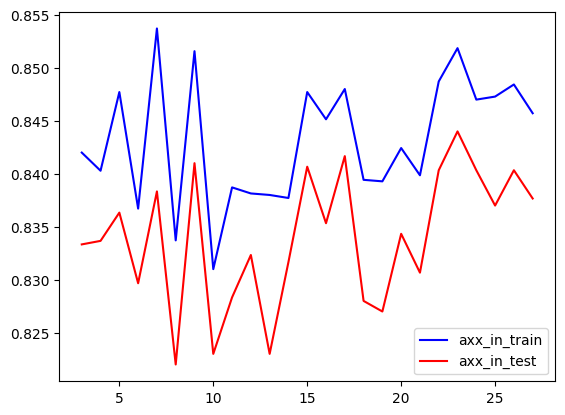

In [ ]:
fig, ax=plt.subplots()
ax.plot(list_n_estimators[:25],list_acc_train[:25], label="axx_in_train", color="blue")
ax.plot(list_n_estimators[:25],list_acc_test[:25], label="axx_in_test", color="red")
ax.legend()

In [ ]:
# El modelo optimo sera de n=estimators =11 y max_depth=5

### 4.5 Regresión Lineal

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
modeloLR=LinearRegression()
modeloLR.fit(x_train,y_train)

y_pred=modeloLR.predict(x_test)

print("Training Accuracy :", modeloLR.score(x_train, y_train))
print("Testing Accuaracy :", modeloLR.score(x_test, y_test))

Training Accuracy : 0.1208018911946972
Testing Accuaracy : 0.11916382416799876


In [ ]:
pd.DataFrame({"Features":np.array(modeloLR.feature_names_in_), "beta":modeloLR.coef_})

,Features,beta
0,Gender_Encode,-0.077507
1,NumOfProducts,-0.057274
2,Tenure,-0.030570
3,EstimatedSalary,0.080442
4,Balance,0.164686
5,CreditScore,-0.066030
6,EstimatedSalary_Log,-0.064034
7,Age,0.544099
8,Geography_Encode,0.028804


## 5. Evaluación

In [ ]:
from sklearn.metrics import accuracy_score
model_list_name=["LogisticRegression", "DecisionTreeClassifier", "RandomForestClassifier", "SVC"]
model_list_object=[
                    LogisticRegression(C=0.1),
                    DecisionTreeClassifier(max_depth=8),
                    RandomForestClassifier(n_estimators=11, max_depth=5),
                    SVC(C=0.5,kernel="rbf")]

model_accuracy_list=list()
for modelo in model_list_object:
    modelo.fit(x_train, y_train)
    y_pred=modelo.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    model_accuracy_list.append(acc)

In [ ]:
pd.DataFrame({"Models":model_list_name, "accuracy":model_accuracy_list})

,Models,accuracy
0,LogisticRegression,0.787000
1,DecisionTreeClassifier,0.845667
2,RandomForestClassifier,0.828333
3,SVC,0.820667


### 5.1 Matriz de Confusión

<AxesSubplot: >

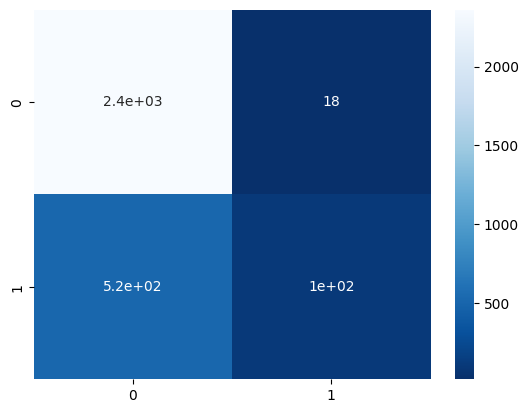

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues_r")

### 5.2 Métricas de error y Exito

In [ ]:
model_list_name=["LogisticRegression", "DecisionTreeClassifier", "RandomForestClassifier", "SVC"]
model_list_object=[
                    LogisticRegression(C=0.1),
                    DecisionTreeClassifier(max_depth=8),
                    RandomForestClassifier(n_estimators=11, max_depth=5),
                    SVC(C=0.5,kernel="rbf")]
model_accuracy_list=list()
model_sensibilidad_list=list()
model_especificidad_list=list()
model_precision_list=list()
model_F1_score_list=list()
model_errortipo1_list=list()
model_errortipo2_list=list()
for modelo in model_list_object:
    modelo.fit(x_train, y_train)
    y_pred=modelo.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    model_accuracy_list.append(acc)
    tn, fp, fn, tp=confusion_matrix(y_test, y_pred).ravel()
    sensibilidad=tp/(tp+fn)
    especificidad=tn/(tn+fp)
    precision=tp/(tp+fp)
    errortipo1=fp/(tn+fp+fn+tp)
    errortipo2=fn/(tn+fp+fn+tp)    
    model_sensibilidad_list.append(sensibilidad)
    model_especificidad_list.append(especificidad)
    model_precision_list.append(precision)
    model_F1_score_list.append(2*precision*sensibilidad/(precision+sensibilidad))
    model_errortipo1_list.append(errortipo1)
    model_errortipo2_list.append(errortipo2)
df_metricas=pd.DataFrame({"Model":model_list_name,
                         "accuracy":model_accuracy_list,
                         "sensibilidad":model_sensibilidad_list,
                         "especificidad":model_especificidad_list,
                         "precision":model_precision_list,
                         "F1_Score":model_F1_score_list,
                         "Error Tipo 1":model_errortipo1_list,
                         "Error Tipo 2":model_errortipo2_list})

df_metricas
                                         

,Model,accuracy,sensibilidad,especificidad,precision,F1_Score,Error Tipo 1,Error Tipo 2
0,LogisticRegression,0.787000,0.083736,0.970576,0.426230,0.139973,0.023333,0.189667
1,DecisionTreeClassifier,0.845667,0.396135,0.963010,0.736527,0.515183,0.029333,0.125000
2,RandomForestClassifier,0.834333,0.275362,0.980244,0.784404,0.407628,0.015667,0.150000
3,SVC,0.820667,0.162641,0.992434,0.848739,0.272973,0.006000,0.173333


### 5.3 Curva ROC AUC

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
p_pred=modeloDT.predict_proba(x_test)
p_pred=p_pred[:,1] #probabilidad de que sea 1 o sea positivo

In [ ]:
fpr, tpr, threshols=roc_curve(y_test, p_pred, pos_label=1)

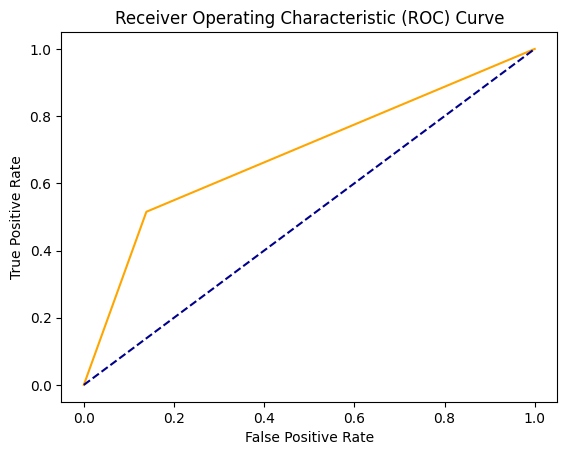

In [ ]:
# fig=plt.figure()
plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0,1], [0,1], color="darkblue", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend=()
plt.show()